In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics


In [2]:
# Generating dataset using make_blob method

dataset = make_blobs(n_samples= 1000,
                    centers = 3,
                    n_features = 2,
                    cluster_std=1.2,
                    random_state=60)

In [3]:
print(dataset)

(array([[-4.31198498, -8.06842333],
       [ 0.77077737, -1.47721334],
       [-3.19169292,  2.59866333],
       ...,
       [-3.7476408 ,  3.91956805],
       [ 3.14931815, -2.72119044],
       [-3.29788389,  2.70486312]]), array([0, 2, 1, 0, 2, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 2, 2, 2, 2, 0,
       1, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1,
       0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 2, 1, 0,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 1, 2, 0, 1, 2, 2,
       2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0,

In [4]:
# Seperating the actual data and actual labels

features = dataset[0]

In [5]:
features

array([[-4.31198498, -8.06842333],
       [ 0.77077737, -1.47721334],
       [-3.19169292,  2.59866333],
       ...,
       [-3.7476408 ,  3.91956805],
       [ 3.14931815, -2.72119044],
       [-3.29788389,  2.70486312]])

In [6]:
features[:5]

array([[-4.31198498, -8.06842333],
       [ 0.77077737, -1.47721334],
       [-3.19169292,  2.59866333],
       [-2.45086372, -6.21408069],
       [ 1.27853364, -1.15544132]])

In [7]:
len(features[:,0]), len(features[:,1])

(1000, 1000)

In [8]:
features[:,0][:5]

array([-4.31198498,  0.77077737, -3.19169292, -2.45086372,  1.27853364])

In [9]:
features[:,1][:5]

array([-8.06842333, -1.47721334,  2.59866333, -6.21408069, -1.15544132])

In [10]:
len(dataset[1])

1000

In [11]:
set(dataset[1])

{0, 1, 2}

In [12]:
# Standardizing the data

X = StandardScaler().fit_transform(features)

In [13]:
# Checking the features after standardization 

X

array([[-0.82144177, -1.5382243 ],
       [ 1.073035  ,  0.04883035],
       [-0.40387999,  1.03023422],
       ...,
       [-0.61109612,  1.34828629],
       [ 1.95957857, -0.25069882],
       [-0.44346011,  1.05580538]])

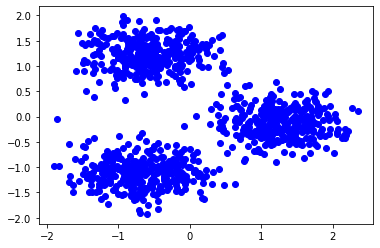

In [14]:
# Scatter plot based on standardized data

plt.scatter(X[:,0], X[:,1], color = "blue")
plt.show()

In [15]:
# Applying KMeans algorithm

kmeans = KMeans(init = "k-means++", n_clusters = 3, n_init = 100)

In [16]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=100)

In [17]:
# Centeroids of the three clusters

clust_cente = kmeans.cluster_centers_

In [18]:
print(clust_cente)

[[ 1.26459569 -0.11760535]
 [-0.68994769 -1.10575025]
 [-0.57257608  1.22667617]]


In [19]:
clust_cente[0][0]

1.264595685445932

In [20]:
# Predicting the labels for each row

pred_labels = kmeans.fit_predict(X)

In [21]:
pred_labels[:5]

array([0, 2, 1, 0, 2])

In [22]:
labels = kmeans.labels_

In [23]:
labels[:5]

array([0, 2, 1, 0, 2])

In [24]:
dataset[1][:5]

array([0, 2, 1, 0, 2])

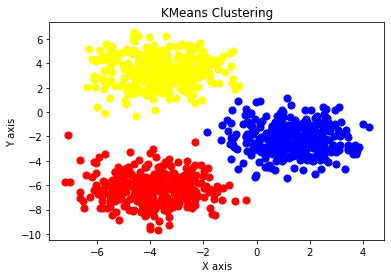

In [25]:
# Plotting the clusters 

plt.scatter(features[pred_labels == 0,0], features[pred_labels == 0,1], s=50, color ="red")
plt.scatter(features[pred_labels == 1,0], features[pred_labels == 1,1], s=50, color ="yellow")
plt.scatter(features[pred_labels == 2,0], features[pred_labels == 2,1], s=50, color ="blue")
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title("KMeans Clustering")

plt.show()

In [26]:
print(f"Homogeneity: {metrics.homogeneity_score(dataset[1],pred_labels)}")


Homogeneity: 0.9876059147486765


In [30]:
Data = pd.DataFrame({'X-axis':features[:,0],'y-axis':features[:,1],'True_labels':dataset[1],'KMeans_labels':pred_labels})

In [31]:
Data

,X-axis,y-axis,True_labels,KMeans_labels
0,-4.311985,-8.068423,0,0
1,0.770777,-1.477213,2,2
2,-3.191693,2.598663,1,1
3,-2.450864,-6.214081,0,0
4,1.278534,-1.155441,2,2
...,...,...,...,...
995,1.763411,-2.008428,2,2
996,0.307415,-4.493160,2,2
997,-3.747641,3.919568,1,1
998,3.149318,-2.721190,2,2
